### Tarea 1 Matematica Aplicada

__Solución de la ecuación del calor por series de Fourier__:

$u(x,t)$: Denota la temperatura a lo largo dde la barra en la posición $x \in [0,L]$ en el instante de tiempo $t$.

\begin{equation}
\begin{cases}
\displaystyle \frac{\partial u}{\partial t}(x,t)=k^2\frac{\partial^2 u}{\partial x^2}(x,t), 
& x\in(0,L),\ t>0,\\[6pt]
u(x,0) = f(x), & x\in[0,L],\\[6pt]
u(0,t) = u(L,t)=0, \quad , &  t \geq 0.
\end{cases}
\end{equation}

nuestra función $f(x)$ está definida por:

\begin{equation}
f(x) =
\begin{cases}
\displaystyle 0 , [0,1]\\[6pt]
x-1, [1,2]\\[6pt]
-2x+5, [2,3]\\[6pt]
x-4, [3,4]\\[6pt]
0, [4,5]\\[6pt]
\end{cases}
\end{equation}

Sea $T=5$, tenemos entonces que la aproximación de $f(x)$ es:
$$f(x)=\sum_{n=1}^{\infty} b_n\sin\!\Big(\frac{2\pi n}{5}x\Big)$$

donde
$$ b_n=\frac{5}{\pi^2 n^2}\Big(-\sin\frac{2\pi n}{5}+3\sin\frac{4\pi n}{5}\Big).$$


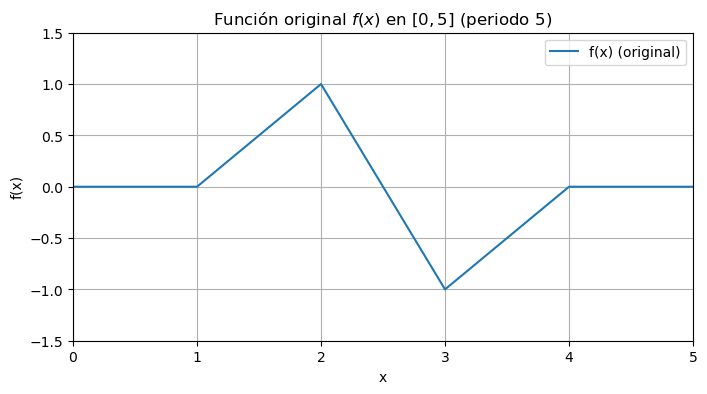

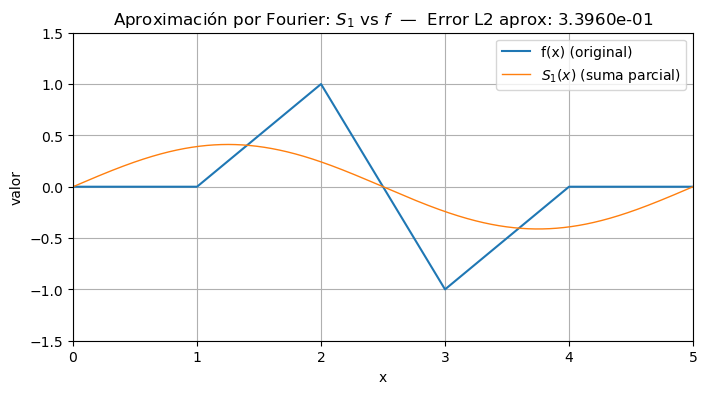

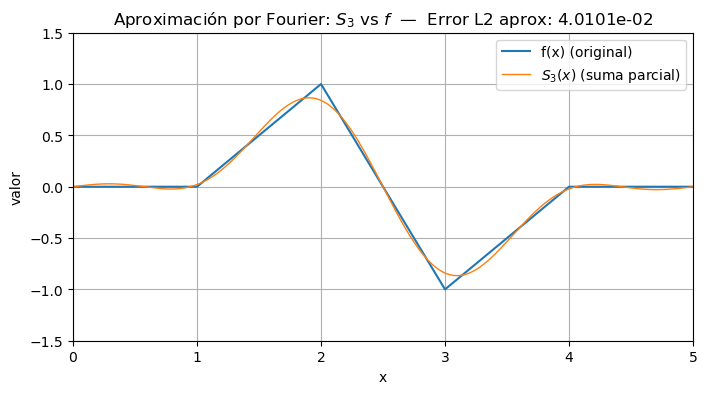

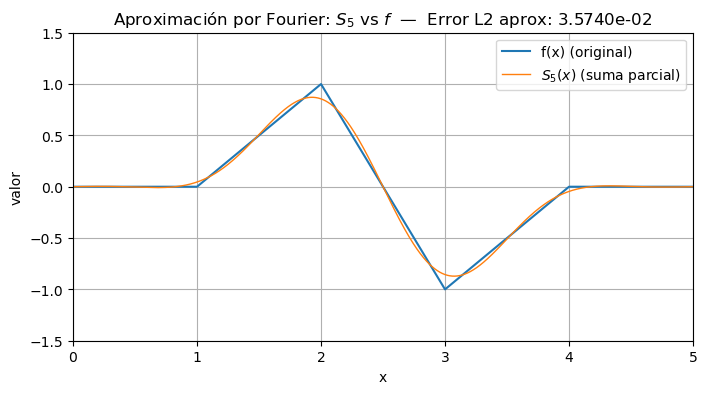

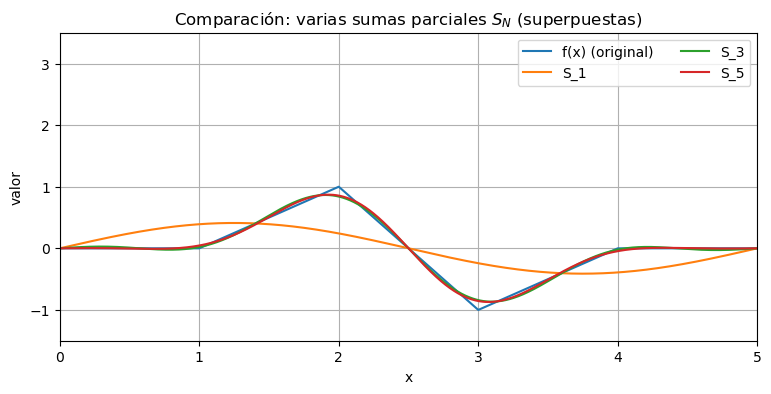

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f_periodic(x):
    # reducir a [0,5) para la periodicidad
    xp = np.mod(x, 5.0)
    y = np.zeros_like(xp)
    # 0 en [0,1]
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    # x-1 en [1,2]
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    # -2x+5 en [2,3]
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    # x-4 en [3,4]
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    # 0 en [4,5]
    mask = (xp >= 4) & (xp < 5)
    y[mask] = 0.0
    return y

# Parámetros
T = 5.0
omega0 = 2*np.pi / T

# Malla para mostrar la función y las aproximaciones
x_plot = np.linspace(0, 5, 2001)
f_plot = f_periodic(x_plot)

# Malla fina para integrar coeficientes con precisión
x_int = np.linspace(0, 5, 40001)
f_int = f_periodic(x_int)

# Función para calcular coeficientes b_n numéricamente
def compute_bn(n):
    integrand = f_int * np.sin(n * omega0 * x_int)
    return (2.0 / T) * np.trapz(integrand, x_int)

# Calculamos b_n hasta N_max necesario
N_max = 50  # suficiente para ver convergencia y calcular S_N hasta 20 o 50
bn = np.array([compute_bn(n) for n in range(1, N_max+1)])

# Función que construye S_N en una malla x a partir de los coeficientes bn
def partial_sum(bn_array, x):
    # bn_array debe corresponder a n=1..len(bn_array)
    N = len(bn_array)
    S = np.zeros_like(x)
    for k in range(1, N+1):
        S += bn_array[k-1] * np.sin(k * omega0 * x)
    return S

# Valores de N que queremos graficar
Ns_to_plot = [1, 3, 5]

# Grafica la función original (por separado) para referencia
plt.figure(figsize=(8,4))
plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
plt.title('Función original $f(x)$ en $[0,5]$ (periodo 5)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0,5)
plt.ylim(min(f_plot)-0.5, max(f_plot)+0.5)
plt.grid(True)
plt.legend()
plt.show()

# Graficar S_N superpuesto con la función original en figuras separadas
for N in Ns_to_plot:
    bn_used = bn[:N]
    S_N = partial_sum(bn_used, x_plot)
    # Calcular error L2 (aprox) en la malla
    error_L2 = np.sqrt(np.trapz((f_plot - S_N)**2, x_plot) / (x_plot[-1] - x_plot[0]))
    plt.figure(figsize=(8,4))
    plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
    plt.plot(x_plot, S_N, label=f'$S_{{{N}}}(x)$ (suma parcial)', linewidth=1.0)
    plt.title(f'Aproximación por Fourier: $S_{{{N}}}$ vs $f$  —  Error L2 aprox: {error_L2:.4e}')
    plt.xlabel('x')
    plt.ylabel('valor')
    plt.xlim(0,5)
    plt.ylim(min(f_plot.min(), S_N.min())-0.5, max(f_plot.max(), S_N.max())+0.5)
    plt.grid(True)
    plt.legend()
    plt.show()

plt.figure(figsize=(9,4))
plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
for N in [1,3,5]:
    plt.plot(x_plot, partial_sum(bn[:N], x_plot), label=f'S_{N}')
plt.title('Comparación: varias sumas parciales $S_N$ (superpuestas)')
plt.xlabel('x')
plt.ylabel('valor')
plt.xlim(0,5)
plt.ylim(min(f_plot.min(), -1)-0.5, max(f_plot.max(), 3)+0.5)
plt.grid(True)
plt.legend(ncol=2)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os

# --- Definición de la función f en [0,5] (misma pieza que definiste) ---
def f_on_0_5(x):
    # x can be array-like
    x = np.asarray(x)
    xp = x.copy()
    # assume x in [0,5]
    y = np.zeros_like(xp, dtype=float)
    # intervals
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp <= 5)  # include 5 endpoint
    y[mask] = 0.0
    return y


# --- Parámetros ---
L = 5.0           # Longitud del dominio
k = 1.0           # Coeficiente de difisuón termica
Nterms = 10     # Cantidad de terminos
nx = 400          # Cantidad de puntos espaciales para graficar
x = np.linspace(0, L, nx)
f_x = f_on_0_5(x)

# Malla para integrar
x_int = np.linspace(0, L, 20001)
f_int = f_on_0_5(x_int)

# Calculo del coeficiente B_n
def compute_Bn(n):
    integrand = f_int * np.sin(n * np.pi * x_int / L)
    return (2.0 / L) * np.trapz(integrand, x_int)

B = np.array([compute_Bn(n) for n in range(1, Nterms+1)])  # shape (Nterms,)

# Precompute spatial sine basis (Nterms x nx)
n_vec = np.arange(1, Nterms+1)
sin_basis = np.sin(np.outer(n_vec * np.pi / L, x))  # shape (Nterms, nx)

# Calculo de u(x,t) y ir sumando
def u_xt(t):
    # exponential decay factors for each n at time t
    decay = np.exp(- (n_vec * np.pi * k / L)**2 * t)  # shape (Nterms,)
    u = (B * decay)[:, None] * sin_basis  # (Nterms, nx)
    return u.sum(axis=0)

# Para la animación
t_max = 0.9      # maximum time to show
frames = 120     # number of frames in animation
t_vals = np.linspace(0, t_max, frames)

# Create figure for animation (single plot)
fig, ax = plt.subplots(figsize=(8,4))
line_u, = ax.plot([], [], lw=1.5, label='u(x,t)')
line_f, = ax.plot(x, f_x, lw=1.0, linestyle='--', label='f(x) (initial)')  # reference
ax.set_xlim(0, L)
ymin = min(f_x.min(), -1.2)
ymax = max(f_x.max(), 1.2)
ax.set_ylim(ymin-0.1, ymax+0.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Ecuación del calor 1D: evolución de u(x,t)')
ax.grid(True)
ax.legend()

def init():
    line_u.set_data([], [])
    return (line_u,)

def animate(i):
    t = t_vals[i]
    u = u_xt(t)
    line_u.set_data(x, u)
    ax.set_title(f'Ecuación del calor 1D — t = {t:.4f}')
    return (line_u,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=50, blit=True)

# --- Guardar animación ---
out_path_mp4 = "animacion.mp4"
out_path_gif = "animacion.gif"
saved_path = None

# Try to save as mp4 with ffmpeg; if fails, fallback to GIF
try:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=30, bitrate=2000)
    anim.save(out_path_mp4, writer=writer)
    saved_path = out_path_mp4
except Exception as e_mp4:
    try:
        from matplotlib.animation import PillowWriter
        writer = PillowWriter(fps=30)
        anim.save(out_path_gif, writer=writer)
        saved_path = out_path_gif
    except Exception as e_gif:
        saved_path = None
        print("No se pudo guardar la animación automatiquement (faltan encoders).")
        print("Errores:", e_mp4, e_gif)

# Show two static frames for quick verification: t=0 and t=t_max
plt.close(fig)  # close the animation figure to avoid duplicate displays in some environments
